# Assignment 2

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
import math
import matplotlib.pyplot as plt
from Chandan_Library_As2 import *


# Question 1
### Solve the linear equations by Cholesky decomposition (check for symmetric matrix) and Gauss-Seidel to a precision of $10^{−6}$.

In [2]:
# Solution of a set of linear equations using Cholesky decomposition

print("The matrix is: ")
matrix, ro, co = read_matrix('As2matrixA.txt')
print_matrix(matrix)

vector = [matrix[i][-1] for i in range(ro)]

# partial pivoting to avoid division by zero at pivot place
matrix, vector = partial_pivot_LU(matrix, vector, ro)
matrix=LU_cho(matrix,ro)
print("The transformed Cholesky matrix is ")
round_matrix(matrix)
print_matrix(matrix)

x=for_back_subs_cho(matrix, ro, vector)

print("Solutions using Cholesky decomposition are : ")
for count in range(ro):
    print('x'+str(count+1)+' = %.1f'%x[count])


The matrix is: 
4.0    -1.0   0.0    -1.0   0.0    0.0    2.0    
-1.0   4.0    -1.0   0.0    -1.0   0.0    1.0    
0.0    -1.0   4.0    0.0    0.0    -1.0   2.0    
-1.0   0.0    0.0    4.0    -1.0   0.0    2.0    
0.0    -1.0   0.0    -1.0   4.0    -1.0   1.0    
0.0    0.0    -1.0   0.0    -1.0   4.0    2.0    

The transformed Cholesky matrix is 
2.0    -0.5   0      -0.5   0      0      2.0    
-0.5   1.94   -0.52  -0.13  -0.52  0      1.0    
0      -0.52  1.93   -0.03  -0.14  -0.52  2.0    
-0.5   -0.13  -0.03  1.93   -0.55  -0.01  2.0    
0      -0.52  -0.14  -0.55  1.85   -0.58  1.0    
0      0      -0.52  -0.01  -0.58  1.84   2.0    

Solutions using Cholesky decomposition are : 
x1 = 1.0
x2 = 1.0
x3 = 1.0
x4 = 1.0
x5 = 1.0
x6 = 1.0


In [3]:
# Solution of a set of linear equations using Gauss Seidel method

print("The matrix is: ")
matrix, ro, co = read_matrix('As2matrixA.txt')
print_matrix(matrix)

vector_b = [matrix[i][-1] for i in range(ro)]

# Solve the system of linear equations using jacobi function
solution = gauss_seidel(matrix, vector_b, tol=1e-7)

# Print the solution
print("Solution using Gauss-Seidel method are :")
for count in range(len(vector_b)):
    print('x'+str(count+1)+' = %.6f'%solution[count])



The matrix is: 
4.0    -1.0   0.0    -1.0   0.0    0.0    2.0    
-1.0   4.0    -1.0   0.0    -1.0   0.0    1.0    
0.0    -1.0   4.0    0.0    0.0    -1.0   2.0    
-1.0   0.0    0.0    4.0    -1.0   0.0    2.0    
0.0    -1.0   0.0    -1.0   4.0    -1.0   1.0    
0.0    0.0    -1.0   0.0    -1.0   4.0    2.0    

Solution using Gauss-Seidel method are :
x1 = 1.000000
x2 = 1.000000
x3 = 1.000000
x4 = 1.000000
x5 = 1.000000
x6 = 1.000000


# Question 2
### Solve the linear equations by Gauss-Jordon and LU factorization.

In [4]:
# Solution of a set of linear equations using Gauss-Jordan

print("The matrix is: ")
matrix, ro, co = read_matrix('As2matrixB.txt')
print_matrix(matrix)

GJ, d = gauss_jordan(matrix, ro, co)

solution = [GJ[i][-1] for i in range(ro)]

if GJ!=None:
    print("Solutions using Gauss-Jordan are : ")
    for count in range(ro):
        print('x'+str(count+1)+' = %.4f'%solution[count])
else:
    print("No unique solution")


The matrix is: 
0.0    4.0    2.0    0.0    1.0    20.0   
4.0    0.0    4.0    10.0   1.0    15.0   
2.0    5.0    1.0    3.0    13.0   92.0   
11.0   3.0    0.0    1.0    2.0    51.0   
3.0    2.0    7.0    1.0    0.0    15.0   

Solutions using Gauss-Jordan are : 
x1 = 2.6746
x2 = 3.7119
x3 = -0.0533
x4 = -0.0744
x5 = 5.2591


In [5]:
# LU decomposition using Doolittle's condition L[i][i]=1

print("The matrix is: ")
matrix, ro, co = read_matrix('As2matrixB.txt')
print_matrix(matrix)

matrix, vector = deaugment_matrix(matrix)
# print("The deaugmented matrix is: ")
# print_matrix(matrix)

# partial pivoting to avoid division by zero at pivot place
matrix, vector = partial_pivot_LU(matrix, vector, ro)
matrix = LU_doolittle(matrix,ro)
print("The transformed LU matrix is ")
print_matrix(matrix)

x = [0 for i in range(ro)]

x = for_back_subs_doolittle(matrix,ro,vector)

print("Solutions are : ")
for count in range(ro):
    print("x["+str(count)+"] = %.4f"%x[count])


The matrix is: 
0.0    4.0    2.0    0.0    1.0    20.0   
4.0    0.0    4.0    10.0   1.0    15.0   
2.0    5.0    1.0    3.0    13.0   92.0   
11.0   3.0    0.0    1.0    2.0    51.0   
3.0    2.0    7.0    1.0    0.0    15.0   

The transformed LU matrix is 
11.0   3.0    0.0    1.0    2.0    
0.0    4.0    2.0    0.0    1.0    
0.181818181818181821.1136363636363638-1.22727272727272752.818181818181818311.522727272727273
0.36363636363636365-0.2727272727272727-3.703703703703702420.0740740740740743.22222222222221
0.27272727272727270.29545454545454547-5.2222222222222210.769372693726937426.079335793357927

Solutions are : 
x[0] = 2.6746
x[1] = 3.7119
x[2] = -0.0533
x[3] = -0.0744
x[4] = 5.2591


In [6]:
# LU decomposition using Crout's condition U[i][i]=1

print("The matrix is: ")
matrix, ro, co = read_matrix('As2matrixB.txt')
print_matrix(matrix)

matrix, vector = deaugment_matrix(matrix)
# print("The deaugmented matrix is: ")
# print_matrix(matrix)

# partial pivoting to avoid division by zero at pivot place
matrix, vector = partial_pivot_LU(matrix, vector, ro)
matrix=LU_crout(matrix,ro)
print("The transformed LU matrix is ")
print_matrix(matrix)

x = [0 for i in range(ro)]

x=for_back_subs_crout(matrix,ro,vector)

print("Solutions are : ")
for count in range(ro):
    print("x["+str(count)+"] = %.4f"%x[count])


The matrix is: 
0.0    4.0    2.0    0.0    1.0    20.0   
4.0    0.0    4.0    10.0   1.0    15.0   
2.0    5.0    1.0    3.0    13.0   92.0   
11.0   3.0    0.0    1.0    2.0    51.0   
3.0    2.0    7.0    1.0    0.0    15.0   

The transformed LU matrix is 
11.0   0.27272727272727270.0    0.090909090909090910.18181818181818182
0.0    4.0    0.5    0.0    0.25   
2.0    4.454545454545455-1.2272727272727275-2.296296296296296-9.388888888888888
4.0    -1.09090909090909084.54545454545454520.074074074074072.153136531365314
3.0    1.18181818181818196.40909090909090915.44444444444444126.079335793357927

Solutions are : 
x[0] = 2.6746
x[1] = 3.7119
x[2] = -0.0533
x[3] = -0.0744
x[4] = 5.2591


# Question 3
### Solve the following almost sparse system $\mathbf{A x = b}$ using and Conjugate Gradient to find the inverse of the matrix $\mathbf{A}$ to a precision of $10^{−4}$. Check the correctness of inverse.


In [7]:
# LU decomposition using Crout's condition U[i][i]=1

print("The matrix is: ")
matrix, ro, co = read_matrix('As2matrixC.txt')
print_matrix(matrix)

matrix, vector = deaugment_matrix(matrix)

solution = Conjugate_Gradient(matrix, vector, tol=1e-8)[0]

print("Solutions are : ")
for count in range(len(solution)):
    print("x["+str(count)+"] = %.4f"%solution[count])

# Verification of the solution
print("\nThe orginally given vector was: ")
for count in range(len(vector)):
    print("%.6f    "%vector[count], end=" ")
print("\n\nOur solution gives the output:")
Verif = multiply_matrix(matrix, solution)
for count in range(len(Verif)):
    print("%.6f    "%Verif[count], end=" ")


The matrix is: 
2.0    -3.0   0.0    0.0    0.0    0.0    -1.6666666666666667
-1.0   4.0    -1.0   0.0    -1.0   0.0    0.6666666666666666
0.0    -1.0   4.0    0.0    0.0    -1.0   3.0    
0.0    0.0    0.0    2.0    -3.0   0.0    -1.3333333333333333
0.0    -1.0   0.0    -1.0   4.0    -1.0   -0.3333333333333333
0.0    0.0    -1.0   0.0    -1.0   4.0    1.6666666666666667

Solutions are : 
x[0] = -0.3333
x[1] = 0.3333
x[2] = 1.0000
x[3] = -0.6667
x[4] = -0.0000
x[5] = 0.6667

The orginally given vector was: 
-1.666667     0.666667     3.000000     -1.333333     -0.333333     1.666667     

Our solution gives the output:
-1.666666     0.666663     2.999996     -1.333335     -0.333332     1.666671     

# Question 4
### Find the inverse of the following matrix using Conjugate Gradient by generating the matrix on fly i.e. without actually storing it. It is a two-dimensional 50 × 50 system with periodic boundary condition Plot the residue versus iteration steps. Use m = 0.2 and convergence criteria to be = $10^{−6}$. 
### $$ \mathbf{A}=\frac{1}{2}\left(\delta_{x+\hat{\mu}, y}+\delta_{x-\hat{\mu}, y}-2 \delta_{x, y}\right)+m^2 \delta_{x, y} $$


100%|██████████| 64/64 [00:06<00:00, 10.35it/s]


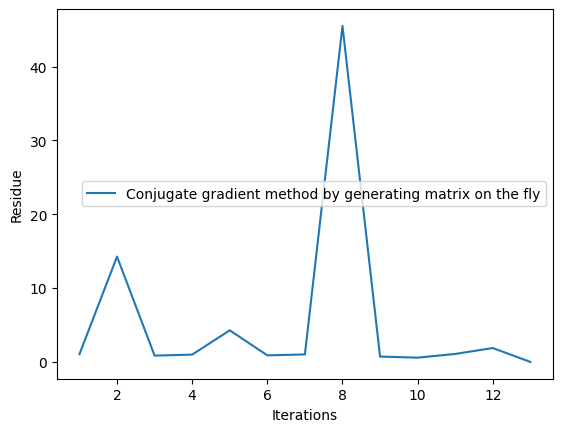

In [8]:
def matrix_function(x, y, n):
    i1 = x%n
    i2 = y%n
    j1 = x//n
    j2 = y//n
    if x == y:
        return -0.96
    if ((i1+1)%n,j1) == (i2,j2):
        return 0.5
    if (i1,(j1+1)%n) == (i2,j2):
        return 0.5
    if ((i1-1)%n,j1) == (i2,j2):
        return 0.5
    if (i1,(j1-1)%n) == (i2,j2):
        return 0.5
    return 0

m=0.2
n = 8
tol = 1e-8

I = get_identity(n**2)
for j in tqdm(range(n**2)):
    A1 = [I[i][j] for i in range(n**2)]
    A1, iter, res = Conjugate_Gradient(matrix_function, A1)             # sending the function as argument instead of matrix
    for count in range(n**2):
        I[count][j] = A1[count]

# Residue plot
plt.plot(iter, res, label='Conjugate gradient method by generating matrix on the fly')
plt.xlabel('Iterations')
plt.ylabel('Residue')
plt.legend()
plt.show()
